In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
#Data from Kaggle

df = pd.read_csv('housing 2.csv')
df.dropna(inplace=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


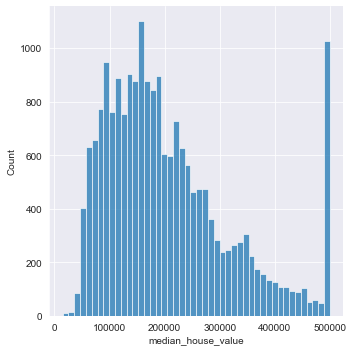

In [5]:
sns.displot(df['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>

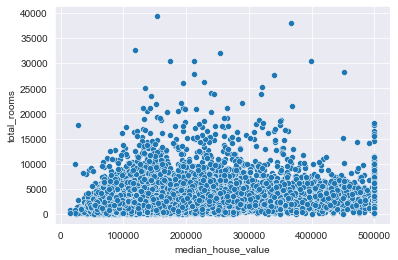

In [6]:
sns.scatterplot(x='median_house_value', y='total_rooms', data=df)

In [7]:
inputs = df.drop('median_house_value', axis=1)

output = df['median_house_value']
output.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [8]:
#Partition the data for training

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, output_train, output_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputs_train_scaled = scaler.fit_transform(inputs_train)
inputs_test_scaled = scaler.transform(inputs_test)

In [10]:
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=True, patience=10)

In [16]:
model.fit(x=inputs_train_scaled, y=output_train.values, validation_data=(inputs_test_scaled, output_test.values), batch_size=128, epochs=300, callbacks=[stop], verbose=True)

Train on 14303 samples, validate on 6130 samples
Epoch 1/300
14303/14303 [==============================] - 1s 42us/sample - loss: 40309808412.2973 - val_loss: 35767770704.3498
Epoch 2/300
14303/14303 [==============================] - 1s 43us/sample - loss: 40324725023.9485 - val_loss: 35431450108.1579
Epoch 3/300
14303/14303 [==============================] - 1s 39us/sample - loss: 39608833922.9980 - val_loss: 35080362006.7184
Epoch 4/300
14303/14303 [==============================] - 1s 38us/sample - loss: 39553577949.7068 - val_loss: 34733347324.4920
Epoch 5/300
14303/14303 [==============================] - 1s 41us/sample - loss: 39710249868.3767 - val_loss: 34400724449.4303
Epoch 6/300
14303/14303 [==============================] - 1s 39us/sample - loss: 39894750686.6017 - val_loss: 34079119591.8617
Epoch 7/300
14303/14303 [==============================] - 1s 39us/sample - loss: 39103505019.1764 - val_loss: 33737297205.7057
Epoch 8/300
14303/14303 [==============================

14303/14303 [==============================] - 1s 36us/sample - loss: 37090803484.3331 - val_loss: 26102062360.9736
Epoch 65/300
14303/14303 [==============================] - 1s 36us/sample - loss: 37091997259.4236 - val_loss: 26066917707.4219
Epoch 66/300
14303/14303 [==============================] - 0s 34us/sample - loss: 37795420619.1999 - val_loss: 26087688075.0669
Epoch 67/300
14303/14303 [==============================] - 1s 43us/sample - loss: 38047056042.8218 - val_loss: 26164798779.0512
Epoch 00067: early stopping


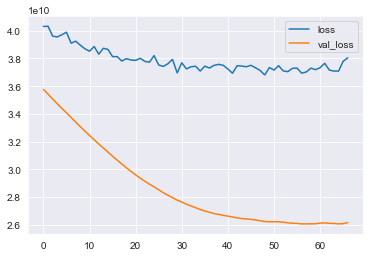

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [58]:
predictions = model.predict(inputs_test_scaled)

#
#print(output_test.values)

for i in range(predictions.size):
    print(predictions[i])
    print("vs")
    print(output_test.values[i])
    print("\n")
    
#Not looking too good


[76799.51]
vs
245800.0


[85539.695]
vs
137900.0


[93268.41]
vs
218200.0


[82353.63]
vs
220800.0


[73639.85]
vs
170500.0


[88807.93]
vs
75000.0


[88819.12]
vs
269400.0


[93666.47]
vs
228900.0


[97992.91]
vs
500001.0


[86195.195]
vs
80800.0


[82584.]
vs
170000.0


[96906.5]
vs
87800.0


[87045.766]
vs
242200.0


[82050.555]
vs
165500.0


[76560.63]
vs
164000.0


[91840.79]
vs
238000.0


[87888.17]
vs
283300.0


[97843.8]
vs
249400.0


[76856.625]
vs
143600.0


[100937.27]
vs
333100.0


[91827.945]
vs
164900.0


[99100.62]
vs
216100.0


[88207.79]
vs
188700.0


[76046.21]
vs
59600.0


[81811.96]
vs
181400.0


[93542.125]
vs
224200.0


[89280.58]
vs
238200.0


[91690.86]
vs
210300.0


[93380.28]
vs
253400.0


[81189.234]
vs
85800.0


[91211.016]
vs
90900.0


[91232.836]
vs
131300.0


[79698.2]
vs
209700.0


[88847.]
vs
244800.0


[86348.484]
vs
283800.0


[106211.32]
vs
400000.0


[115335.49]
vs
500001.0


[88333.77]
vs
73500.0


[84620.9]
vs
169600.0


[115687.16]
vs
340300.0




[93978.16]
vs
95000.0


[98929.06]
vs
219500.0


[83640.22]
vs
182400.0


[83739.91]
vs
109100.0


[98252.61]
vs
500001.0


[93771.09]
vs
246000.0


[86745.266]
vs
236900.0


[78437.914]
vs
270000.0


[96415.87]
vs
293500.0


[110401.93]
vs
500001.0


[92653.08]
vs
159200.0


[78260.88]
vs
500001.0


[102593.01]
vs
500001.0


[73497.26]
vs
142100.0


[84471.12]
vs
126600.0


[83704.555]
vs
173400.0


[90993.4]
vs
141900.0


[90238.53]
vs
216500.0


[81390.79]
vs
250000.0


[95119.7]
vs
119800.0


[81457.75]
vs
111500.0


[80561.055]
vs
239000.0


[95167.234]
vs
369300.0


[95146.445]
vs
290900.0


[91365.]
vs
200300.0


[96764.305]
vs
85900.0


[100700.5]
vs
282100.0


[96813.99]
vs
380600.0


[88411.82]
vs
122600.0


[101709.13]
vs
500001.0


[89413.266]
vs
161700.0


[92956.1]
vs
458300.0


[94828.27]
vs
122500.0


[84893.984]
vs
348400.0


[84612.28]
vs
121400.0


[83684.84]
vs
196900.0


[82156.14]
vs
500001.0


[96719.52]
vs
393100.0


[93025.3]
vs
215900.0


[79727.82]
vs
126300.

[97665.336]
vs
87500.0


[85784.805]
vs
178100.0


[91681.64]
vs
218500.0


[86527.09]
vs
238600.0


[95529.64]
vs
79800.0


[84265.77]
vs
103400.0


[91557.53]
vs
353600.0


[84452.8]
vs
183600.0


[84820.28]
vs
55000.0


[73868.75]
vs
162000.0


[86496.73]
vs
310600.0


[81120.21]
vs
168300.0


[68891.56]
vs
55500.0


[98859.32]
vs
312400.0


[84838.63]
vs
165200.0


[97319.34]
vs
402900.0


[98364.21]
vs
96700.0


[82496.32]
vs
181800.0


[88655.42]
vs
275000.0


[103884.914]
vs
43500.0


[93552.2]
vs
255100.0


[92929.375]
vs
376600.0


[85479.875]
vs
151400.0


[83398.7]
vs
238500.0


[81620.39]
vs
126800.0


[81865.836]
vs
212500.0


[98275.086]
vs
320100.0


[77331.28]
vs
276000.0


[96517.37]
vs
144400.0


[92301.414]
vs
362300.0


[88830.98]
vs
68600.0


[90501.64]
vs
165400.0


[91989.86]
vs
273000.0


[95910.54]
vs
147500.0


[96050.12]
vs
231600.0


[90178.16]
vs
64100.0


[98538.51]
vs
151400.0


[87940.9]
vs
53000.0


[85511.67]
vs
227400.0


[93820.73]
vs
432100.0


[907

64100.0


[103087.31]
vs
162500.0


[78811.18]
vs
300000.0


[79032.96]
vs
177400.0


[98130.555]
vs
248400.0


[85334.59]
vs
54400.0


[92473.15]
vs
116400.0


[94487.766]
vs
314900.0


[80559.48]
vs
97100.0


[93880.055]
vs
248700.0


[100689.516]
vs
457400.0


[89410.4]
vs
171000.0


[95882.33]
vs
219000.0


[81809.97]
vs
60200.0


[87870.95]
vs
156700.0


[86823.484]
vs
305800.0


[90057.586]
vs
131300.0


[89740.03]
vs
140500.0


[89422.97]
vs
174400.0


[93419.54]
vs
500001.0


[90634.36]
vs
129700.0


[97862.164]
vs
200900.0


[94578.14]
vs
174000.0


[87599.445]
vs
267100.0


[87368.234]
vs
268100.0


[93879.28]
vs
162500.0


[85337.43]
vs
155000.0


[96482.71]
vs
163500.0


[89347.734]
vs
141800.0


[81487.71]
vs
100000.0


[79918.13]
vs
103100.0


[100994.414]
vs
352800.0


[83254.08]
vs
60400.0


[94798.42]
vs
168800.0


[96343.336]
vs
434700.0


[88582.58]
vs
195300.0


[92224.51]
vs
171300.0


[87439.055]
vs
140500.0


[81004.28]
vs
120200.0


[67562.41]
vs
55000.0


[7787

[88197.92]
vs
265000.0


[76968.01]
vs
106300.0


[98045.86]
vs
162500.0


[101308.29]
vs
352300.0


[90194.63]
vs
145800.0


[82353.01]
vs
397700.0


[102468.13]
vs
229300.0


[97199.85]
vs
500001.0


[106194.36]
vs
258400.0


[78815.9]
vs
80400.0


[75995.32]
vs
140800.0


[89288.84]
vs
151900.0


[107229.805]
vs
500001.0


[90654.66]
vs
175900.0


[89418.22]
vs
166300.0


[87669.195]
vs
160200.0


[115373.96]
vs
500001.0


[85313.76]
vs
50000.0


[85390.8]
vs
159800.0


[96385.93]
vs
283300.0


[87305.375]
vs
116200.0


[109297.84]
vs
500001.0


[87066.01]
vs
191500.0


[92641.98]
vs
174000.0


[98785.78]
vs
500001.0


[96551.39]
vs
156300.0


[93888.06]
vs
84600.0


[81078.59]
vs
80700.0


[74139.96]
vs
54400.0


[81327.24]
vs
153300.0


[95457.29]
vs
162500.0


[89642.83]
vs
212600.0


[95793.06]
vs
200000.0


[103559.04]
vs
310000.0


[92826.72]
vs
320500.0


[90863.984]
vs
66100.0


[107167.73]
vs
283300.0


[89094.51]
vs
189400.0


[90418.01]
vs
70300.0


[91999.32]
vs
142500.0

[85084.625]
vs
214800.0


[88499.33]
vs
125500.0


[95848.47]
vs
500001.0


[99356.68]
vs
93400.0


[88049.63]
vs
196900.0


[87624.35]
vs
283200.0


[81137.78]
vs
130100.0


[82323.81]
vs
310500.0


[74038.68]
vs
225600.0


[81599.74]
vs
225000.0


[97975.41]
vs
158200.0


[86524.086]
vs
97300.0


[83205.37]
vs
186500.0


[100923.86]
vs
299200.0


[81291.836]
vs
121400.0


[85690.984]
vs
409700.0


[93430.625]
vs
187500.0


[102529.24]
vs
217300.0


[86458.97]
vs
337500.0


[85278.305]
vs
268800.0


[76448.48]
vs
196700.0


[96650.65]
vs
140400.0


[87724.24]
vs
101000.0


[88151.32]
vs
156400.0


[103081.41]
vs
315200.0


[89170.53]
vs
163500.0


[118170.89]
vs
320900.0


[88539.05]
vs
191900.0


[84058.234]
vs
341300.0


[102978.93]
vs
232500.0


[78565.875]
vs
121700.0


[89897.9]
vs
169300.0


[99425.2]
vs
329600.0


[80485.87]
vs
108900.0


[91447.484]
vs
500001.0


[84075.95]
vs
146400.0


[107525.08]
vs
395200.0


[90916.58]
vs
137500.0


[87173.85]
vs
128300.0


[90060.664]
vs

[82379.84]
vs
103100.0


[86757.516]
vs
217600.0


[81418.78]
vs
189600.0


[87987.4]
vs
247900.0


[92844.234]
vs
160100.0


[90645.3]
vs
82800.0


[92716.664]
vs
132200.0


[88708.695]
vs
90300.0


[95262.76]
vs
220600.0


[85995.09]
vs
335000.0


[72786.78]
vs
125500.0


[90322.67]
vs
282100.0


[79732.66]
vs
170600.0


[86293.18]
vs
109400.0


[88495.02]
vs
233000.0


[97957.766]
vs
500001.0


[97123.55]
vs
361500.0


[101920.72]
vs
236100.0


[95013.33]
vs
248200.0


[99412.336]
vs
500001.0


[83475.1]
vs
94600.0


[100505.305]
vs
341700.0


[72566.48]
vs
162500.0


[79618.06]
vs
164400.0


[98970.87]
vs
194300.0


[91386.055]
vs
68100.0


[92651.]
vs
68900.0


[87844.42]
vs
79200.0


[92044.22]
vs
211300.0


[102304.945]
vs
362700.0


[81136.21]
vs
157500.0


[77123.28]
vs
161300.0


[91041.64]
vs
87000.0


[94285.47]
vs
194100.0


[90785.21]
vs
170800.0


[77330.664]
vs
65000.0


[94443.82]
vs
90000.0


[72887.195]
vs
226800.0


[101234.24]
vs
213100.0


[74873.91]
vs
100300.0



[78172.25]
vs
92700.0


[99277.555]
vs
336100.0


[73189.8]
vs
110300.0


[84636.69]
vs
84700.0


[93309.83]
vs
403700.0


[85474.25]
vs
212800.0


[78876.586]
vs
275000.0


[109011.086]
vs
357300.0


[84054.49]
vs
364200.0


[87500.05]
vs
225000.0


[79129.56]
vs
149300.0


[89819.1]
vs
383100.0


[92039.82]
vs
333100.0


[88683.984]
vs
139100.0


[93444.02]
vs
78000.0


[76745.125]
vs
249100.0


[84547.336]
vs
107800.0


[95488.72]
vs
500001.0


[88677.18]
vs
59100.0


[79881.85]
vs
215000.0


[86805.664]
vs
225000.0


[89366.89]
vs
153300.0


[87129.805]
vs
358800.0


[93051.79]
vs
259800.0


[87897.36]
vs
82200.0


[92467.85]
vs
112200.0


[90093.33]
vs
475000.0


[88180.086]
vs
197300.0


[98437.945]
vs
419200.0


[87878.69]
vs
236700.0


[92478.19]
vs
240300.0


[82245.77]
vs
112900.0


[85200.016]
vs
68300.0


[79879.29]
vs
91400.0


[96865.484]
vs
170100.0


[86599.87]
vs
305200.0


[73305.43]
vs
134700.0


[84268.055]
vs
180700.0


[88262.9]
vs
76300.0


[92089.87]
vs
314000.0


[87833.914]
vs
174200.0


[99779.086]
vs
99400.0


[86602.55]
vs
146200.0


[92346.195]
vs
166700.0


[92108.59]
vs
103000.0


[80219.76]
vs
325400.0


[86033.59]
vs
266200.0


[88185.96]
vs
164600.0


[81540.27]
vs
244700.0


[97215.61]
vs
123200.0


[107452.35]
vs
500001.0


[105676.91]
vs
275000.0


[83754.67]
vs
145000.0


[111968.695]
vs
500001.0


[84069.44]
vs
66000.0


[89948.42]
vs
146900.0


[87491.13]
vs
126200.0


[87760.336]
vs
182100.0


[93766.58]
vs
199300.0


[98146.57]
vs
281300.0


[87969.695]
vs
287600.0


[97362.71]
vs
500001.0


[81621.9]
vs
300000.0


[97819.92]
vs
477700.0


[100982.1]
vs
168100.0


[81979.55]
vs
114200.0


[85544.85]
vs
159200.0


[84049.01]
vs
177500.0


[83117.74]
vs
348600.0


[99586.45]
vs
429300.0


[77311.88]
vs
214300.0


[91893.28]
vs
151200.0


[78648.37]
vs
500001.0


[91033.195]
vs
170000.0


[102363.414]
vs
326100.0


[97502.195]
vs
500001.0


[96653.164]
vs
151900.0


[77342.89]
vs
90300.0


[95545.41]
vs
330400.0


[88501.62]
vs


[94547.84]
vs
68900.0


[87974.85]
vs
267400.0


[81843.27]
vs
222700.0


[81093.48]
vs
93200.0


[91364.37]
vs
192600.0


[78753.414]
vs
116700.0


[85583.53]
vs
258500.0


[77744.336]
vs
216900.0


[79690.8]
vs
205000.0


[100365.17]
vs
168300.0


[77124.6]
vs
223100.0


[75542.17]
vs
79500.0


[85303.08]
vs
133300.0


[91301.28]
vs
170800.0


[86344.07]
vs
159400.0


[85699.06]
vs
200600.0


[95088.67]
vs
87000.0


[82963.85]
vs
81700.0


[83850.32]
vs
158300.0


[97494.164]
vs
317800.0


[84506.79]
vs
91600.0


[96671.875]
vs
474600.0


[80148.21]
vs
255400.0


[98962.375]
vs
325900.0


[92436.19]
vs
140300.0


[102451.64]
vs
265700.0


[83974.12]
vs
92600.0


[96180.67]
vs
334300.0


[91314.945]
vs
101100.0


[77896.46]
vs
94500.0


[92163.125]
vs
223000.0


[89481.92]
vs
72300.0


[100561.44]
vs
131900.0


[101626.09]
vs
118400.0


[72853.01]
vs
87500.0


[92711.]
vs
105200.0


[84868.4]
vs
152100.0


[80749.18]
vs
98500.0


[98521.016]
vs
127600.0


[84281.61]
vs
125300.0


[898



[78429.66]
vs
270800.0


[92247.28]
vs
206300.0


[73203.734]
vs
162500.0


[87049.92]
vs
357000.0


[97479.22]
vs
74700.0


[92755.96]
vs
267000.0


[89148.49]
vs
192300.0


[81633.99]
vs
171400.0


[90715.086]
vs
71700.0


[109223.59]
vs
500001.0


[79027.9]
vs
191700.0


[102460.98]
vs
368600.0


[91396.46]
vs
157300.0


[97566.13]
vs
188400.0


[98798.48]
vs
381800.0


[79734.195]
vs
80300.0


[75447.22]
vs
165100.0


[98511.414]
vs
293500.0


[89638.06]
vs
99100.0


[88542.125]
vs
134100.0


[87981.06]
vs
309300.0


[88630.91]
vs
124600.0


[87152.84]
vs
121900.0


[73437.97]
vs
140600.0


[98046.516]
vs
395700.0


[101641.92]
vs
137500.0


[78895.734]
vs
241900.0


[95885.29]
vs
152400.0


[88991.7]
vs
183800.0


[93804.96]
vs
271100.0


[92131.81]
vs
201800.0


[92953.24]
vs
244300.0


[76515.125]
vs
121600.0


[91707.75]
vs
206300.0


[87137.48]
vs
229200.0


[91285.84]
vs
94200.0


[91806.72]
vs
182300.0


[91971.086]
vs
211500.0


[98175.93]
vs
44000.0


[104329.03]
vs
5000

[83891.92]
vs
193800.0


[87081.72]
vs
170500.0


[89759.83]
vs
146900.0


[83124.7]
vs
247700.0


[90407.26]
vs
118200.0


[75580.18]
vs
231300.0


[86319.83]
vs
138200.0


[84166.1]
vs
154300.0


[92826.875]
vs
178300.0


[76567.055]
vs
226000.0


[91733.53]
vs
64700.0


[91809.875]
vs
367700.0


[87017.38]
vs
82200.0


[90612.43]
vs
500001.0


[81750.16]
vs
192400.0


[85229.516]
vs
500001.0


[92366.83]
vs
178600.0


[88391.64]
vs
225000.0


[102526.21]
vs
213100.0


[87390.484]
vs
100000.0


[99279.27]
vs
399000.0


[95892.43]
vs
68500.0


[113976.65]
vs
500001.0


[120971.4]
vs
500001.0


[90596.055]
vs
64100.0


[66618.6]
vs
137500.0


[89938.7]
vs
276900.0


[97507.48]
vs
55000.0


[94103.38]
vs
500001.0


[81330.83]
vs
57800.0


[87582.21]
vs
169300.0


[88912.84]
vs
262500.0


[90544.805]
vs
96800.0


[98892.39]
vs
320000.0


[91851.64]
vs
247900.0


[92482.99]
vs
275100.0


[98842.36]
vs
162500.0


[84212.82]
vs
268800.0


[85423.37]
vs
230400.0


[87849.14]
vs
107200.0


[8

187300.0


[97289.305]
vs
113500.0


[97233.67]
vs
150000.0


[95667.5]
vs
205100.0


[89023.586]
vs
192600.0


[82217.08]
vs
197500.0


[92174.2]
vs
187500.0


[78659.55]
vs
165500.0


[91222.94]
vs
381800.0


[90473.74]
vs
500001.0


[85512.47]
vs
143200.0


[77007.67]
vs
184100.0


[78984.875]
vs
135000.0


[102815.234]
vs
109800.0


[97294.94]
vs
230100.0


[96703.72]
vs
500001.0


[87272.39]
vs
198800.0


[89129.98]
vs
356300.0


[86859.74]
vs
144500.0


[91976.78]
vs
187500.0


[93542.79]
vs
145600.0


[91591.65]
vs
173300.0


[84872.82]
vs
252000.0


[96656.55]
vs
244800.0


[86514.83]
vs
287100.0


[118133.055]
vs
500001.0


[101169.1]
vs
125500.0


[84085.625]
vs
202400.0


[91701.3]
vs
246400.0


[92282.2]
vs
326700.0


[101864.695]
vs
500001.0


[85203.18]
vs
48900.0


[92899.47]
vs
348200.0


[93465.84]
vs
52500.0


[83376.22]
vs
325000.0


[96510.555]
vs
385000.0


[77404.164]
vs
244500.0


[76838.96]
vs
240300.0


[94212.805]
vs
165700.0


[80441.766]
vs
160800.0


[93468

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(output_test, predictions))

print(np.sqrt(mean_squared_error(output_test, predictions)))

121268.15085070861
161755.36671002867
